Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

1 -> person having Diabetes

0 -> person not having Diabetes

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
correlate=df.corr()

<Axes: >

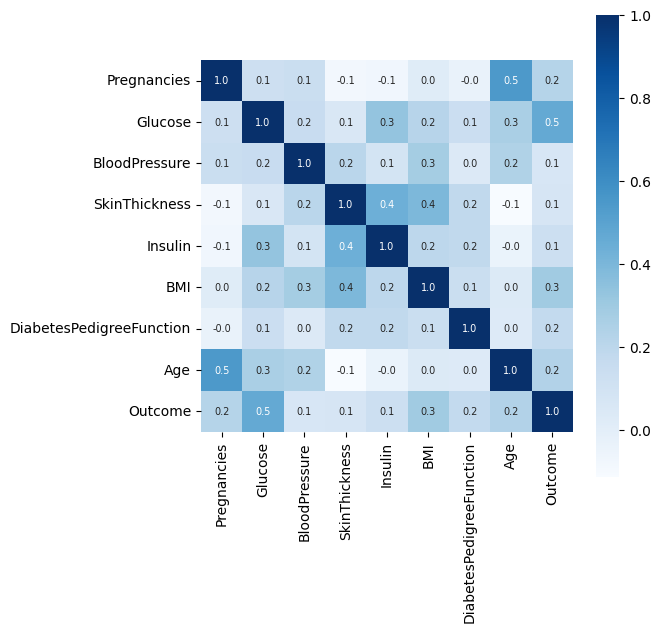

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(correlate,annot=True,fmt=".1f",square=True,annot_kws=({'size':7}),cmap="Blues")

In [11]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

Hyper-parameter tuning

In [12]:
from sklearn.model_selection import RandomizedSearchCV

In [13]:
model=SVC()
parameter={'C':[1,5,10],
           'kernel':['linear','rbf']}
m=RandomizedSearchCV(model,parameter,cv=5)
m.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10],
                                        'kernel': ['linear', 'rbf']})

In [14]:
m.best_params_

{'kernel': 'linear', 'C': 5}

In [15]:
model=SVC(kernel='linear',C=5)

Splitting the data into training and testing data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [17]:
model.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [18]:
y_train_predicted=model.predict(x_train)
y_test_predicted=model.predict(x_test)

In [19]:
train_accuracy=accuracy_score(y_train_predicted,y_train)
test_accuracy=accuracy_score(y_test_predicted,y_test)

In [20]:
print(f"Training accuracy is {train_accuracy}")

Training accuracy is 0.7736156351791531


In [21]:
print(f"Testing accuracy is {test_accuracy}")

Testing accuracy is 0.8051948051948052


Bulding a predictive system


In [22]:
import warnings

# Suppress specific warning
warnings.filterwarnings('ignore',category=UserWarning)


# user input data
input_data=[10,168,74,0,0,38,0.537,34]

# converting the input list to numpy array
input_data=np.asarray(input_data)

#reshaping the array as the model takes only 2D input
input_data_reshaped=input_data.reshape(1,-1)

#predicting the model
predict=model.predict(input_data_reshaped)

if predict[0]==0:
  print("The person is not Diabetic")
else:
  print("The person is Diabetic")

The person is Diabetic


In [23]:
import pickle

In [24]:
file_name="diabetes_model.sav"
pickle.dump(model,open(file_name,"wb"))

In [25]:
loaded=pickle.load(open(file_name,"rb"))
loaded

SVC(C=5, kernel='linear')

In [26]:
for column in x.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
